# <font color=orange>End to End AI Based(Recurrent train Enabled) Model Development for PII Extraction and label Dection! Lets do it!?</font>

<img src="https://blog.exxactcorp.com/wp-content/uploads/2019/07/NLP-bg.png" alt="Drawing" style="height: 400px ;"/>

## Objective:
It is a Classical NLP Problem, but is it random or a Language model?
Given the Data in which we have the text data
1. My approach will be doing Basic EDA on the training Data and comparing wit Test(I have save them in diferent files)
2. Defining Approach for machine learning model(I should know if the labels are put randomly or through a language).

In the mean While i will try to answer the questions asked!

#### 3. Provide details on how you can identify ambiguity, e.g. Jordan can be name or country or person, how will you identify this.
When it is a Random Entity i.e. suppose the text is like  

"yxyyxyy ysysyysys JORDAN Xdtdttdyd" or lets say 

Grass JORDAN is green" 

in the above two examples there is no language at all i mean there is no pattern at all, so even a human will fail to answer These Random occurrence.
But When a text follows a Language such as

"I am going to Jordan" or lets say 
"jordan, Well Played!" and with the multiple instance training the model will understand the flow of noun,verb,model verb etc. 

there is a language and there is a pattern involved in these cases There are a lot of models to understand language and they are called Language models which solves these problems.
Example: Conditional Random fields(it is a sequence model not language model still it can perform best to understand the language), Elmo(Deep contextualized word representations), BERT(Bidirectional Representation of Transformers) or Transformers, Seq2seq With Attention. I will try one of these to solve this probelm.

It can solve problem like, "I work at Google" Google is a noun here
"I Google at work" Google is a Verb here.

The Approach can be basically of Two types:
1. Hard Coded Regex
2. Building a Language/Non Laguage CRF based model. (I will do the 2nd one and will focus on different models and why i have gone with the model)

#### Please Find the Demo of final Built APP.
P.S. It can be deployed in any cloud plat form.

github: https://github.com/Kartik-Patnaik/pii-extraction



In [35]:
from IPython.display import YouTubeVideo
from IPython.display import Image

YouTubeVideo('https://www.youtube.com/watch?v=UipJTuZwaXs&ab_channel=KartikPatnaik', width=800, height=300)

#### Let me import the data first to see if it really is a language model or a Random Entity being tagged based on which i will choose my model.

Importing the required Packages/Modules

In [20]:
import pandas as pd
import pandas_profiling

Importing the train and test file

In [23]:
train = pd.read_csv("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/train.csv",encoding= "latin1")
test = pd.read_csv("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/test.csv",encoding= "latin1")

In [26]:
train.describe()

,Text,Labels,PII
count,800,800,800
unique,800,8,441
top,Themselves early our 584516367052 bit. Institu...,CreditCardNumber,None
freq,1,100,100


In [27]:
test.describe()

,Text
count,16000
unique,16000
top,Environment down 4341 Hayden Center cause laug...
freq,1


#### Understandig the training size

The training data consist of 800 records where as the test set consist of 16000 records!
The data to test is a biased by the degrees of freedom..
No issues a Good model can catch the patten if its a Language model.

* categories and 800 labels to train

Lets focus on Few categories groubp by!

In [32]:
df  = train.groupby('Labels').head(3).reset_index(drop=True)
df.head(24)

,Text,Labels,PII
0,Candidate economic character present money dau...,Address,Apt. 026
1,Film range sound. People age Apt. 476 that.,Address,Apt. 476
2,Back want myself class certain. Tree pretty ca...,Address,Suite 492
3,Candidate economic character present money dau...,CreditCardNumber,2254280030993205
4,Film range 30325919279187 sound. People age that.,CreditCardNumber,3.03259E+13
5,4534678333333995 Back want myself class certai...,CreditCardNumber,4534678333333995
6,lowejennifer@smith-michael.com Candidate econo...,Email,lowejennifer@smith-michael.com
7,Film range sound. People age that. douglaslewi...,Email,douglaslewis@yahoo.com
8,Back want tamarafox@torres.com myself class ce...,Email,tamarafox@torres.com
9,Candidate economic character present money Mic...,Name,Michael


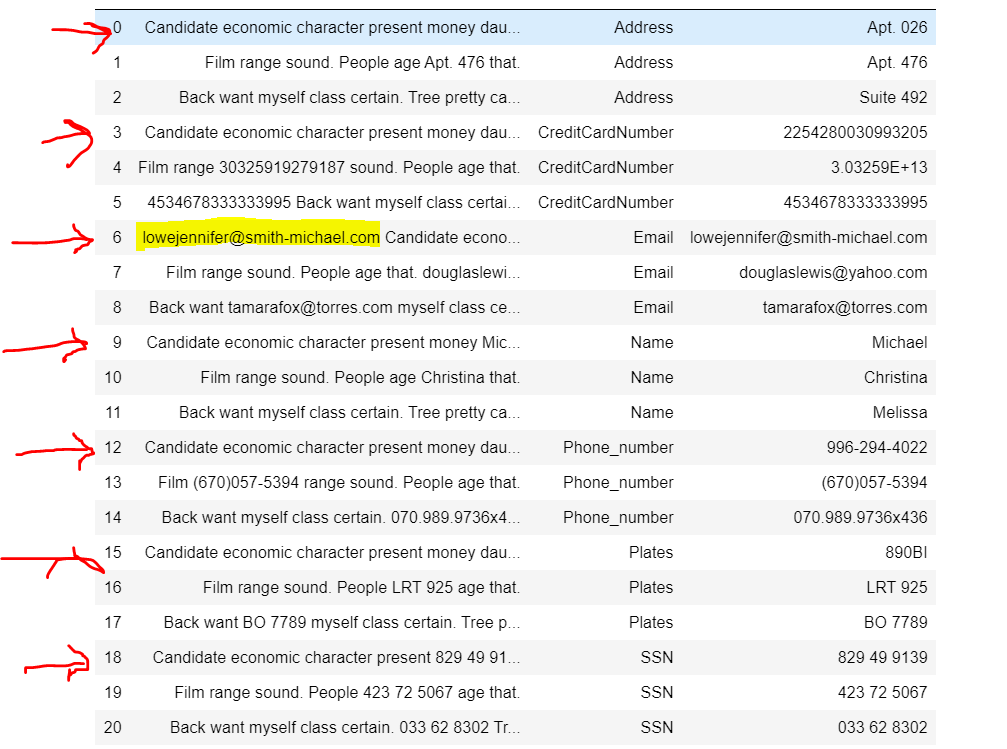

P.S.
### <font color=orange> All Records are random and the Labels are forcefully inserted!

It is a random flow and there is no sequence.

### <font color=orange> There is actually 100 text and the 8 labels are inserted into this in a random Fashion..

There is no flow, and no language for the entities except the records in label "NONE"..this is a language..


##### <font color=blue> I have to build a model in such a way that it will understand the flow of #NONE and any disturbance caused will be the entity..yes it is simple...a regex will work

##### <font color=blue>  but the problem is test set is 20 times more than the training and text repetition in the same fashion as train.By default model will overfit..

#### Approach:

1. Basic Approach:

    a. Regex based maching: Yes this will work but every time something new comes you have to write the regex.

2. Machine Learning way:

    a. Build a classification model for label prediction and map it to the regex But the problem is it will not understand the sequence as "The united states of America" and "United The states of America will be same" or "I work at google" and "I google at work" will be same.
    b. The best thing about the labels is its pattern, They definitely can be seen and a human can easily interpret in most of the cases..Lets think about different approach how we can solve this and pick th best.
    
    Elmo(Deep contextualized word representations): Using this as an ner tagger, It is  a bidirectional neural network used to understand language..but we dont have a proper language here as the test set is completely different.  
    
    BERT(Bidirectional Representation of Transformers) or Transformers: Same applies here as well, It finds the sequence to understand the language
    
    Seq2seq With Attention.: Using this as an ner tagger but the context vector can't hold random memory
    
    Conditional Random fields: Yes, using this i can train for a custom tagged entity
    linear chain Conditional Random Field inorder to understand the random effects of language, So i will be using this..
    
    Discriminative undirected probabilistic graphical model.

### Conditional Random fields:
Conditional random fields (CRFs) are a class of statistical modeling method often applied in pattern recognition and machine learning and used for structured prediction. Whereas a classifier predicts a label for a single sample without considering "neighboring" samples, a CRF can take context into account. To do so, the prediction is modeled as a graphical model, which implements dependencies between the predictions. What kind of graph is used depends on the application. For example, in natural language processing, linear chain CRFs are popular, which implement sequential dependencies in the predictions. In image processing the graph typically connects locations to nearby and/or similar locations to enforce that they receive similar predictions.

Source:  https://en.wikipedia.org/wiki/Conditional_random_field

How will i implement, How will i prepare the data and How will i train the model:

#### Data preparation:
I will convert this problem into a NER tagged problem, Inorder to do so i will convert the training data into JSON for a easy to use format, And do the data wrangling in order to account and prepare a required format. 

#### P.S. I have used Atom for the whole script building and app development.Will attach the code paths from github and demonstrate.

#### <font color=red>  code allignment_1.py : The code to prepare the data
    
#### <font color=red>train.py : The code tot train the model

#### <font color=red> app.py : the final model which will do the scoring, an deployment.

###  <font color=blue> 1. code allignment_1.py : The code to prepare the data

I will convert this problem into a ner problem i.e. each entity will be tagged to a word.

The steps i will do are:

1. Convert the Data frame into a JSON.
2. Use proper merge/Join to make sure they are in a format that is acceptable by the model.
3. Suppose we want to train in future it will automatically append in the old file to make sure training is done on old as well as new input..


The below code converts the Input file to JSON and Converts into tsv format.

In [51]:
import json
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import os
from collections import OrderedDict
os.chdir("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/")

df = pd.read_csv("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/train.csv",encoding= "latin1")
df["sentence"] = """ "sentence" """ + ":" + '"' +df["Text"]+ '"'+","
df["tags"] = """ "tags" """+ ":" + "{"+'"'+df["Labels"]+'"'+":"+'"'+ df["PII"]+'"'+"}"
df["final_json"] = "{"+df["sentence"]+df["tags"]+"}"
df = df["final_json"]

user_inputk = df.to_dict()
user_inputk1 = list(OrderedDict(sorted(user_inputk.items())).values())

f = open ('train.json', "r") 
user_input = json.loads(f.read()) 
user_input

[{'sentence': 'Candidate economic character present money daughter Apt. 026 world well. Open analysis center.',
  'tags': {'Address': 'Apt. 026'}},
 {'sentence': 'Film range sound. People age Apt. 476 that.',
  'tags': {'Address': 'Apt. 476'}},
 {'sentence': 'Back want myself class certain. Tree pretty career environment change letter top. Suite 492',
  'tags': {'Address': 'Suite 492'}},
 {'sentence': 'Bring guy 81627 Kimberly Squares Washingtonberg, RI 13540 hold green girl.',
  'tags': {'Address': '81627 Kimberly Squares Washingtonberg, RI 13540'}},
 {'sentence': '52013 Jason Vista Lake Kathleen, PA 89168 May lay not boy case citizen. Woman executive dog pull traditional dinner.',
  'tags': {'Address': '52013 Jason Vista Lake Kathleen, PA 89168'}},
 {'sentence': 'Themselves early our bit. Institution peace spring 4058 Gordon Fields South Charlestown, NJ 40537 agree ever. Involve do play realize true consumer reality.',
  'tags': {'Address': '4058 Gordon Fields South Charlestown, NJ 4

The below code will prepare the data in the required format.

In [58]:
for i in range(len(user_input)):        
    user_input_1 = user_input[i]
    wanted_keys = ['sentence']
    wanted_keys1 = ['tags']
    sentence = {k: user_input_1[k] for k in set(wanted_keys) & set(user_input_1.keys())}
    sentence = list( sentence.values() )[0]            
#    sentence = sentence.lower()  
    article = sentence[:]
    def find_match(sentence,df):
        for i in range(df.shape[0]):
            if sentence.find(df['rpl'][i]) !=-1:
                sentence = sentence[:sentence.find(df['rpl'][i])] +  df['rpl1'][i] +  sentence[sentence.find(df['rpl'][i])+ len(df['rpl'][i]):]
        return sentence
                       
    tags = {k: user_input_1[k] for k in set(wanted_keys1) & set(user_input_1.keys())}
    tags = list( tags.values() )[0]
    tags = {k:str(v) for k, v in tags.items()}
#    def lower_dict(d):
#        new_dict = dict((k, v.lower()) for k, v in d.items())
#        return new_dict
#    tags = lower_dict(tags)
    new_list = [] 
    for key, value in tags.items():
        new_list.append([key, value])
    ui1 = pd.DataFrame(new_list)
    ui1.columns = ['action','sentence']
    ui1["sentence1"] = ""
                    
    uik = ui1[ui1["sentence1"]=="Found"]
    uik["sentence"] = uik["sentence"].astype(str).str[:-6] #Strip time zone        
    uik["sentence"] = pd.to_datetime(uik["sentence"], errors='coerce')
    uik["sentence"] = uik["sentence"].dt.strftime('%Y-%m-%d')            
    uik = uik.query('sentence != "NaT"')
    uik = uik.drop(['sentence1'], axis=1)
    ui1 = ui1.drop(['sentence1'], axis=1)
    ui1 = ui1.append(uik, ignore_index=True) 
                    
        
    k = ui1.apply(lambda row: nltk.word_tokenize(row['sentence']), axis=1)
    k = pd.DataFrame(k)
    k.columns = ["sentence"]
    new = k.sentence.apply(pd.Series)
    new["action"]=ui1["action"]
    df_new = pd.DataFrame()
    for label, content in new.items():
        df_new1 = pd.DataFrame()
        df_new1[0] = new["action"]
        df_new1[1] = new[label]
        df_new = df_new.append(df_new1, ignore_index=True)
        df_new = df_new[df_new[0] != df_new[1]]
        df_new = df_new.dropna()
    lst_ip1 = word_tokenize(sentence)
    lst_ip3 = pd.DataFrame(lst_ip1)
    lst_ip3.columns = ['sentence']
    df_new.columns = ['action','sentence']
    #################################################join
    result = pd.merge(lst_ip3,
                     df_new,
                     on='sentence', 
                     how='left')             
    
    result['action'] = result['action'].fillna('o')
    result['key'] = (result['sentence'] != result['sentence'].shift(1)).astype(int).cumsum()
    result =result.groupby(['key', 'sentence'])['action'].apply('#$#'.join).to_frame()
    result = result.reset_index()
    result['sentence'] = result['sentence'].map(str) + " " + result["action"]
    user_input3 = result['sentence']
    user_input3.to_csv('user_input3.tsv',header=False, index=False)
    user_input3 = pd.read_csv('user_input3.tsv', sep='\t',header = None)
    exists = os.path.isfile('dummy-corpus1.tsv')
    exists1 = os.path.isfile('dummy-corpus2.tsv')
    if exists and not exists1:
        pa1 = pd.read_csv('dummy-corpus1.tsv', sep='\t',header = None)
        pa2 = pa1.append(user_input3,ignore_index=True)
        pa2 = pa2.append(["**** o"])
    elif exists1 and exists:
        pa1 = pd.read_csv('dummy-corpus2.tsv', sep='\t',header = None)
        pa2 = pa1.append(user_input3,ignore_index=True)
        pa2 = pa2.append(["**** o"])  
    else:
        pa2 = user_input3
        pa2 = pa2.append(["**** o"])

    pa2.to_csv('dummy-corpus.tsv',header=False, index=False)

The input to the model looks like

In [63]:
pa1 = pd.read_csv('dummy-corpus1.tsv', sep='\t',header = None)
pa1.head(20)

,0,1
0,Candidate,o
1,economic,o
2,character,o
3,present,o
4,money,o
5,daughter,o
6,Apt,Address
7,.,Address
8,26,Address
9,world,o


The whole data is transposed and the labels are mapped according to its corresponding values and sthe start and the end of each text is denoted by ****
****
In order to let the model know the end of text..

###  <font color=blue> 2. train.py : train the model

We will be training the model here after the data is created as per required format.
The below code will take care of traning and generate the object file.

In [66]:
import os
import pathlib
#from flask_cors import CORS, cross_origin

os.chdir("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/")
cwd = os.getcwd()
cwd = pathlib.PureWindowsPath(cwd)
cwd = cwd.as_posix()
prop = "trainFile = "+ str(cwd) +"/" + """dummy-corpus1.tsv
        serializeTo ="""+ str(cwd) +"/" +"""corpus-taggingk.ser.gz
        map = word=0,answer=1
        useClassFeature=true
        useWord=true
        useNGrams=true
        noMidNGrams=true
        maxNGramLeng=6
        usePrev=true
        useNext=true
        useSequences=true
        usePrevSequences=true
        maxLeft=1
        useTypeSeqs=true
        useTypeSeqs2=true
        useTypeySequences=true
        wordShape=chris2useLC
        useDisjunctive=true"""
            
file = open( str(cwd) +"/" +'/prop1.txt', 'w')
file.write(prop)
file.close()
myCmd = 'java -jar stanford-ner.jar -mx4g -prop' " "  + 'prop1.txt'
myCmd
os.system(myCmd)


0

In above code i have tuned the hyper paramenters and other parameters as per requirement you can change accordingly!

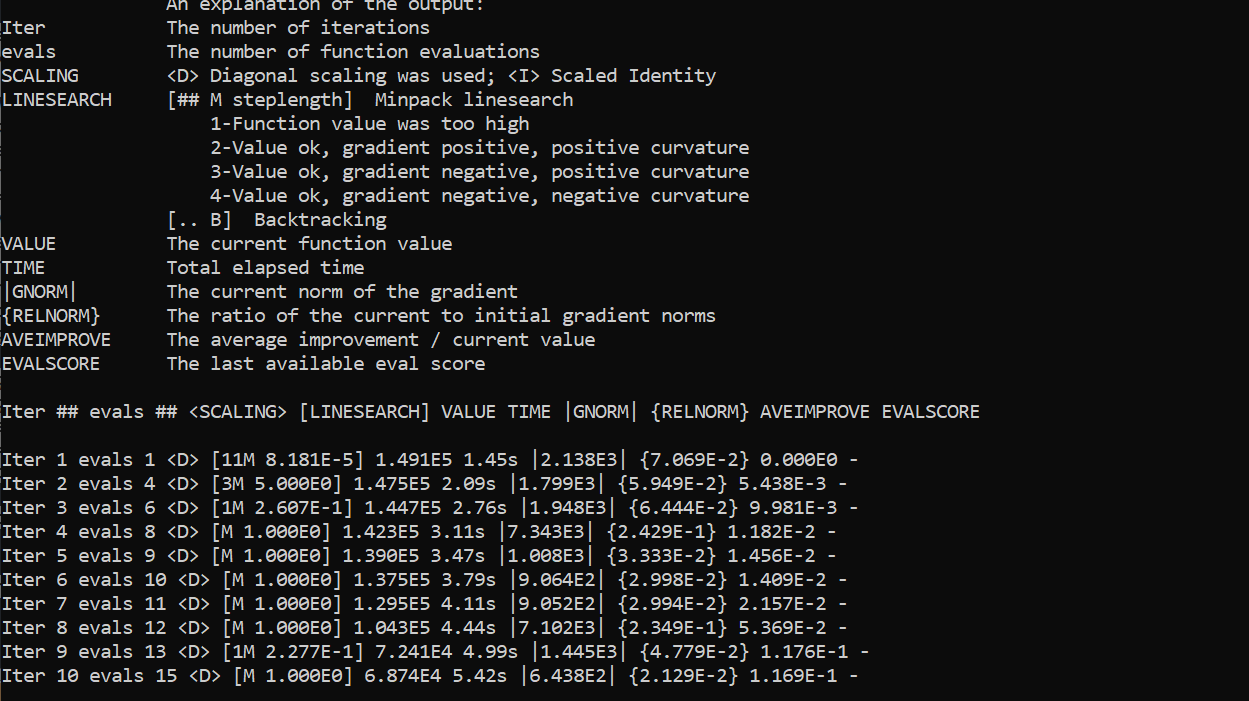

The accuracy is measured using GNORM RELNORM and average improvement, The model will stop at the iteration where there is no or marginal Update in Values..

###  <font color=blue> 3. app.py : Predict and score

1. This is the model used for scoring
2. This is completely deployable model and can be deployed in any server with minimal requirement.
3. Here we will score the test file consisting of 16000 records.
But for demo purpose i wil run for 10 records only.

In [70]:
from nltk.tag import StanfordNERTagger  
import nltk
import json
from flask import Flask, render_template, request
import pandas as pd
jar = 'C:/Users/KPATNAIk/Desktop/Topic_Modelling1/stanford-ner.jar'
model = 'C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/corpus-tagging.ser.gz'

app = Flask(__name__)
@app.route('/',methods = ['GET', 'POST'])
def upload_file():
   return render_template('index.html')
@app.route('/data',methods = ['GET', 'POST'])
def data():
    if request.method=="POST":
        f = request.form['csvfile']
        df = pd.read_csv(f,encoding= "latin1")
#        df = pd.read_csv("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/test.csv",encoding= "latin1")
        df = df.head(10)
        df['Text1'] = df['Text'] +" "+"****"
        df['Text1'] = "****"+" "+df['Text1']
        ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')
        for i, row in df.iterrows():
            words = nltk.word_tokenize(row["Text1"])
            results = ner_tagger.tag(words)
            filter = ['o']
            ls2 = [(x,y) for (x,y) in results if y not in filter] 
            d = {}
            for a, b in ls2:
                d.setdefault(b, []).append(a)
            new_abc = [ [ ' '.join(d.pop(b)), b ] for a, b in ls2 if b in d ]
            if len(new_abc) != 0:
                df.at[i,'Labels'] = new_abc[0][1]
                df.at[i,'PII'] = new_abc[0][0]
            else:
                df.at[i,'Labels'] = "None"
                df.at[i,'PII'] = "None"
        df = df.drop(["Text1"],axis = 1)
        df.to_csv("test1.csv")
        data = df
        return render_template('data.html',data=data.to_html())

if __name__ == '__main__':
    app.run("0.0.0.0",threaded=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Sep/2020 16:32:52] "GET / HTTP/1.1" 200 -


The server started runnnig in a local instance and the video of the same is shared accross in the beginning.

###  <font color=blue> Final Verdict:

lets look at the final output produced by the model:

In [72]:
test = pd.read_csv("C:/Users/KPATNAIk/Desktop/Topic_Modelling1/one_trust/test1.csv",encoding= "latin1")

In [75]:
test.head(50)

,Text,Labels,PII
0,Term although process suddenly parent. Poor go...,Address,5539 Donna Centers Suite 339
1,"356 Collins Highway New Kathleen, NM 10160 Rem...",Address,"356 Collins Highway New Kathleen , NM 10160"
2,Appear job opportunity job. Piece 405 Callahan...,Address,Piece 405 Callahan Knolls
3,During half leave simple west lose piece 859 D...,Address,"859 Daniel Fall Apt . 901 Larsonland , IN 34955"
4,Peace when Apt. 910 enter left speak agree. Le...,Address,Apt . 910
5,Identify energy two human Suite 105 both surfa...,Address,Suite 105
6,"Whom 223 Pamela Forge Suite 971 Carrfort, IA 3...",Address,"223 Pamela Forge Suite 971 Carrfort , IA 39954"
7,"04455 Howard River South Paul, FL 36774 End wo...",Address,"04455 Howard River South Paul , FL 36774 End w..."
8,Full 081 Bryan Cape Apt. 324 voice toward leav...,Address,081 Bryan Cape Apt .
9,Direction couple whole effect author apply six...,Address,"50200 Baker Common Suite 040 Rachelberg , VA 6..."


The final result looks good although there are few challanges with the model but yes this can be improved with multiple iterations and tests.

The codes and requirement are uploaded in github , and along with the video demo file